In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import seaborn as sns
import sys

In [ ]:
sys.path.append(r'C:\Users\simle\OneDrive\Documents\Apexon\MLFlow')
from Models.KNN import knn_app


In [ ]:
dt = pd.read_csv(r'C:\Users\simle\OneDrive\Documents\Apexon\MLFlow\HR_Employee_Attrition_Dataset.csv')

In [4]:

to_get_dummies_for = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus']

# Creating dummy variables
df = pd.get_dummies(data = dt, columns = to_get_dummies_for, drop_first = True,dtype=int)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)


Y = df.Attrition
X = df.drop(columns = ['Attrition','Over18'])

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)


In [5]:

knn = KNeighborsClassifier()

In [6]:
train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.20)
    
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
        test_error.append(1 - knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

print(knn_many_split)

{1: [0.0, 0.08891585760517791], 2: [0.05477926285945727, 0.14288025889967643], 3: [0.06022681247468613, 0.1591423948220065], 4: [0.11737545565006073, 0.14935275080906152], 5: [0.10838396111786144, 0.14741100323624598], 6: [0.1268732280275415, 0.14716828478964405], 7: [0.12211421628189549, 0.1491100323624596], 8: [0.13703928716079383, 0.14959546925566347], 9: [0.13185500202511138, 0.15088996763754053], 10: [0.14159578776832726, 0.15056634304207125], 11: [0.13710004050222763, 0.15186084142394826], 12: [0.14345889023896313, 0.14991909385113272], 13: [0.1407249898744431, 0.14595469255663437], 14: [0.14627379505872826, 0.1538834951456311]}


In [ ]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Standard Significance', 'High Significacnce'], yticklabels = ['Standard SIgnificance', 'High Significance'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

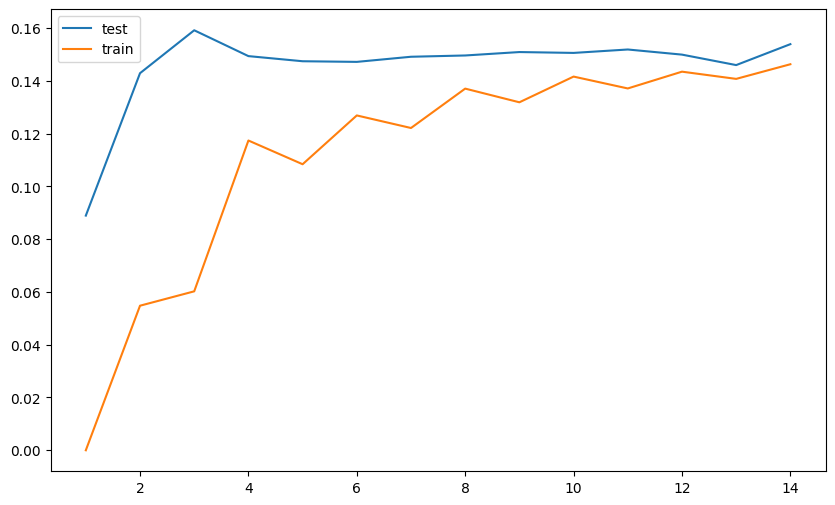

In [10]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1726
           1       0.82      0.45      0.58       332

    accuracy                           0.89      2058
   macro avg       0.86      0.71      0.76      2058
weighted avg       0.89      0.89      0.88      2058



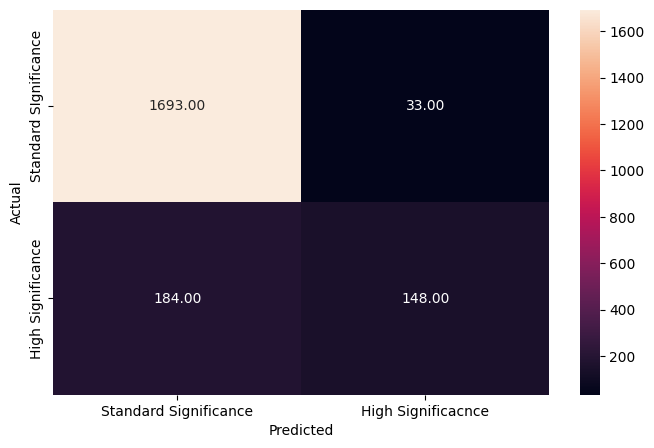

In [28]:
y_pred_train_knn = knn.predict(x_train)
metrics_score(y_train, y_pred_train_knn)